# Computer Vision
Here the CMM networks will be described and compared with Fully connected layers. All algorithm will be shown on example from real food image database 

Below all steps will be demonstrated one by one

# Import dataset

In [1]:
import zipfile

# Dowload a dataset in .zip
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

# Unpack / unzip dataset
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-05-16 08:45:44--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.103.128, 108.177.120.128, 142.251.6.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.103.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   125MB/s    in 0.8s    

2022-05-16 08:45:45 (125 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



# Visualize data
The dataset has been downloaded. To start working with it we must get know more about itself. To do so we must visualize data. To visualize it we must find how to open/operate with downloaded dataset first

**Database structure**

In [2]:
# Look what is inside of downloaded database folder
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train

pizza  steak


In [4]:
s = !ls pizza_steak/train/pizza
print("Data type of list in folder: ", type(s))
print("First 50 characters of list: \n", s.nlstr[0:50])

Data type of list in folder:  <class 'IPython.utils.text.SList'>
First 50 characters of list: 
 1008104.jpg  1638227.jpg  2235981.jpg  2774899.jpg


In [5]:
# Browse whole database folder
# with os.walk
import os

for root, dirs, files in os.walk("pizza_steak"):
  print(f"There are #{len(dirs)} directories and #{len(files)} files In the directory {root}")

There are #2 directories and #0 files In the directory pizza_steak
There are #2 directories and #0 files In the directory pizza_steak/test
There are #0 directories and #250 files In the directory pizza_steak/test/pizza
There are #0 directories and #250 files In the directory pizza_steak/test/steak
There are #2 directories and #0 files In the directory pizza_steak/train
There are #0 directories and #750 files In the directory pizza_steak/train/pizza
There are #0 directories and #750 files In the directory pizza_steak/train/steak


Now the structure of database seems to be more clear
```
Example of file structure

pizza_steak <- top level folder
└───train <- training images
│   └───pizza
│   │   │   1008104.jpg
│   │   │   1638227.jpg
│   │   │   ...      
│   └───steak
│       │   1000205.jpg
│       │   1647351.jpg
│       │   ...
│   
└───test <- testing images
│   └───pizza
│   │   │   1001116.jpg
│   │   │   1507019.jpg
│   │   │   ...      
│   └───steak
│       │   100274.jpg
│       │   1653815.jpg
│       │   ...    
 ```


**Load variables**

First of all, we are getting names of classes programmatically

In [6]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


Now we create a helper function to view a random image from the set

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Run the cell below to view a random image

Image shape: (512, 512, 3)


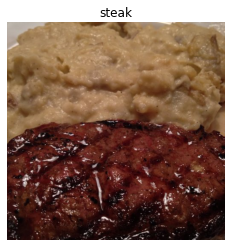

In [8]:
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

# CNN - Convolutional Neural Networks

### Typical architecture of a convolutional neural network

Convolutional neural networks are no different to other kinds of deep learning neural networks in the fact they can be created in many different ways. What you see below are some components you'd expect to find in a traditional CNN.

Components of a convolutional neural network:

| **Hyperparameter/Layer type** | **What does it do?** | **Typical values** |
| ----- | ----- | ----- |
| Input image(s) | Target images you'd like to discover patterns in| Whatever you can take a photo (or video) of |
| Input layer | Takes in target images and preprocesses them for further layers | `input_shape = [batch_size, image_height, image_width, color_channels]` |
| Convolution layer | Extracts/learns the most important features from target images | Multiple, can create with [`tf.keras.layers.ConvXD`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) (X can be multiple values) |
| Hidden activation | Adds non-linearity to learned features (non-straight lines) | Usually ReLU ([`tf.keras.activations.relu`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu)) |
| Pooling layer | Reduces the dimensionality of learned image features | Average ([`tf.keras.layers.AvgPool2D`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/AveragePooling2D)) or Max ([`tf.keras.layers.MaxPool2D`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D)) |
| Fully connected layer | Further refines learned features from convolution layers | [`tf.keras.layers.Dense`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) |
| Output layer | Takes learned features and outputs them in shape of target labels | `output_shape = [number_of_classes]` (e.g. 3 for pizza, steak or sushi)|
| Output activation | Adds non-linearities to output layer | [`tf.keras.activations.sigmoid`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/sigmoid) (binary classification) or [`tf.keras.activations.softmax`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax) |

How they stack together:

![](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-simple-convnet.png)
*A simple example of how you might stack together the above layers into a convolutional neural network. Note the convolutional and pooling layers can often be arranged and rearranged into many different formations.*

What we know so far abot data:

1.   It has 2 classes
2.   Train consists of 750 samples for each class and test has 250
3.   The samples has 3 colours but differ in size

From the paper on dataset we know that RF deals with classification with 50.76%, but we reduced classes to two, so we can't really compare them

Usually we build a baseline (RF) and then trying to beat it with new model



In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3, # can also be (3, 3)
                         activation="relu", 
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 25s 281ms/step - loss: 0.5910 - accuracy: 0.6667 - val_loss: 0.4160 - val_accuracy: 0.8260
Epoch 2/5
47/47 [==============================] - 12s 252ms/step - loss: 0.4191 - accuracy: 0.8080 - val_loss: 0.3399 - val_accuracy: 0.8580
Epoch 3/5
47/47 [==============================] - 12s 255ms/step - loss: 0.3952 - accuracy: 0.8280 - val_loss: 0.4919 - val_accuracy: 0.7400
Epoch 4/5
47/47 [==============================] - 12s 254ms/step - loss: 0.3740 - accuracy: 0.8447 - val_loss: 0.3212 - val_accuracy: 0.8500
Epoch 5/5
47/47 [==============================] - 12s 253ms/step - loss: 0.3049 - accuracy: 0.8760 - val_loss: 0.2989 - val_accuracy: 0.8760


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

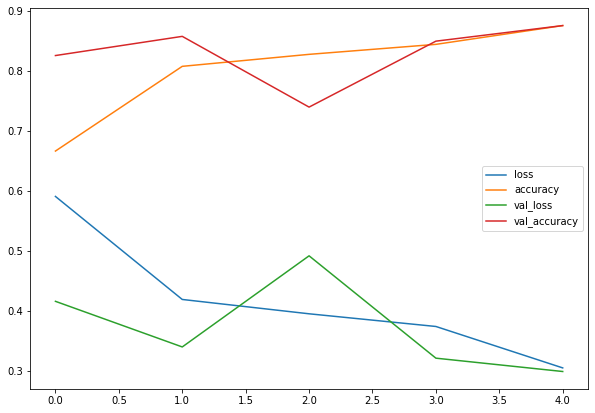

In [10]:
import pandas as pd
pd.DataFrame(history_1.history).plot(figsize=(10,7));

model_1.summary()

# CNN vs FeedForward
To realise advantages of CNN the results will be compared to feedworward neural networks

In [11]:
# Define a FeedForward Neural Network
# Set the architecture of 4 hidden layers with 100 neurons
model_2 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(100, activation="relu"),                                      
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(1, activation="softmax")                                   
])

# Compile the model
# Set the Adam optimizer, define the loss to be crossentropy, 
# set to record accuracy
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model and record metrics for epochs
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 11s 225ms/step - loss: 2.3520 - accuracy: 0.5000 - val_loss: 1.8499 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 10s 219ms/step - loss: 0.8831 - accuracy: 0.5000 - val_loss: 0.8717 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 10s 218ms/step - loss: 0.8432 - accuracy: 0.5000 - val_loss: 0.5351 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 10s 217ms/step - loss: 0.5612 - accuracy: 0.5000 - val_loss: 0.5918 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 10s 217ms/step - loss: 0.5264 - accuracy: 0.5000 - val_loss: 0.4466 - val_accuracy: 0.5000


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, None)              0         
                                                                 
 dense_1 (Dense)             (None, 100)               15052900  
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,083,301
Trainable params: 15,083,301


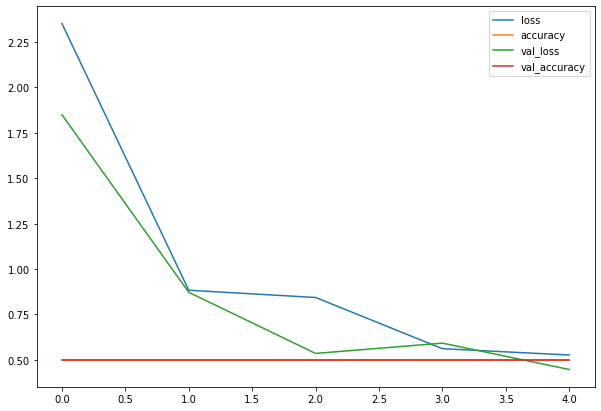

In [12]:
model_2.summary()
pd.DataFrame(history_2.history).plot(figsize=(10,7));

In [13]:
# Define a FeedForward Neural Network
# Set the architecture of 4 hidden layers with more neurons
model_3 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(200, activation="relu"),                                      
  tf.keras.layers.Dense(500, activation="relu"),
  tf.keras.layers.Dense(500, activation="relu"),
  tf.keras.layers.Dense(200, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")                                   
])

# Compile the model
# Set the Adam optimizer, define the loss to be crossentropy, 
# set to record accuracy
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model and record metrics for epochs
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 11s 227ms/step - loss: 4.4578 - accuracy: 0.5927 - val_loss: 0.4992 - val_accuracy: 0.7580
Epoch 2/5
47/47 [==============================] - 10s 221ms/step - loss: 0.5799 - accuracy: 0.7280 - val_loss: 0.6375 - val_accuracy: 0.6860
Epoch 3/5
47/47 [==============================] - 10s 223ms/step - loss: 0.5157 - accuracy: 0.7580 - val_loss: 0.4560 - val_accuracy: 0.7780
Epoch 4/5
47/47 [==============================] - 10s 219ms/step - loss: 0.4888 - accuracy: 0.7793 - val_loss: 0.4523 - val_accuracy: 0.7860
Epoch 5/5
47/47 [==============================] - 10s 221ms/step - loss: 0.4756 - accuracy: 0.7820 - val_loss: 0.4458 - val_accuracy: 0.7940


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, None)              0         
                                                                 
 dense_6 (Dense)             (None, 200)               30105800  
                                                                 
 dense_7 (Dense)             (None, 500)               100500    
                                                                 
 dense_8 (Dense)             (None, 500)               250500    
                                                                 
 dense_9 (Dense)             (None, 200)               100200    
                                                                 
 dense_10 (Dense)            (None, 1)                 201       
                                                                 
Total params: 30,557,201
Trainable params: 30,557,201


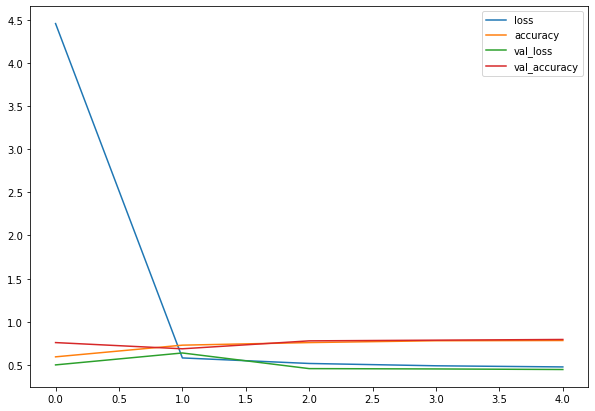

In [14]:
model_3.summary()
pd.DataFrame(history_3.history).plot(figsize=(10,7));

In [15]:
# Define a FeedForward Neural Network
# Set the architecture of 4 hidden layers with more neurons
model_4 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(200, activation="relu"),                                      
  tf.keras.layers.Dense(500, activation="relu"),
  tf.keras.layers.Dense(500, activation="relu"),
  tf.keras.layers.Dense(200, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")                                   
])

# Compile the model
# Set the Adam optimizer, define the loss to be crossentropy, 
# set to record accuracy
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model and record metrics for epochs
history_4 = model_4.fit(train_data,
                        epochs=25,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/25
47/47 [==============================] - 11s 228ms/step - loss: 4.9029 - accuracy: 0.5747 - val_loss: 0.5574 - val_accuracy: 0.6940
Epoch 2/25
47/47 [==============================] - 10s 221ms/step - loss: 0.5777 - accuracy: 0.7167 - val_loss: 0.4651 - val_accuracy: 0.7760
Epoch 3/25
47/47 [==============================] - 10s 221ms/step - loss: 0.4759 - accuracy: 0.7807 - val_loss: 0.4505 - val_accuracy: 0.7880
Epoch 4/25
47/47 [==============================] - 10s 222ms/step - loss: 0.5131 - accuracy: 0.7560 - val_loss: 0.5552 - val_accuracy: 0.7680
Epoch 5/25
47/47 [==============================] - 10s 218ms/step - loss: 0.4907 - accuracy: 0.7720 - val_loss: 0.4401 - val_accuracy: 0.7840
Epoch 6/25
47/47 [==============================] - 10s 221ms/step - loss: 0.4169 - accuracy: 0.8040 - val_loss: 0.4606 - val_accuracy: 0.7820
Epoch 7/25
47/47 [==============================] - 10s 220ms/step - loss: 0.4656 - accuracy: 0.7780 - val_loss: 0.4725 - val_accuracy: 0.7740

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, None)              0         
                                                                 
 dense_11 (Dense)            (None, 200)               30105800  
                                                                 
 dense_12 (Dense)            (None, 500)               100500    
                                                                 
 dense_13 (Dense)            (None, 500)               250500    
                                                                 
 dense_14 (Dense)            (None, 200)               100200    
                                                                 
 dense_15 (Dense)            (None, 1)                 201       
                                                                 
Total params: 30,557,201
Trainable params: 30,557,201


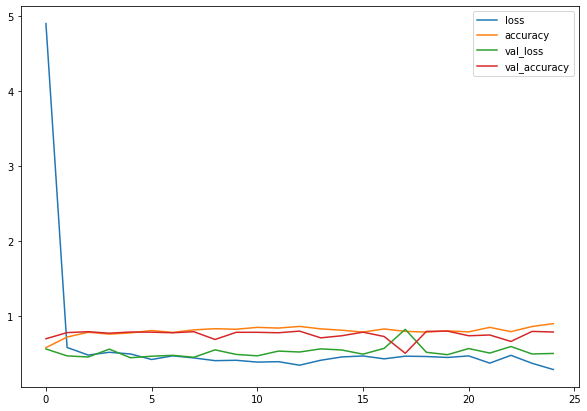

In [16]:
model_4.summary()
pd.DataFrame(history_4.history).plot(figsize=(10,7));

It is clearly seen that increase in epochs doesn't benefit. Moreover, after 10 epichs the validation error starts rising fast which could be the result of overfitting.

***Summary***

1 CNN was tried and 3 Feed Forward NN were tried as well. Here are the results

Model | Parameters | Validation Accuracy | Epochs
--- | :---: | :---: | :---:
CNN | 31k | 87.8% | 5
FNN | 15M | 50% | 5 
FNN | 30M | 70% | 5
FNN | 30M | 74% | 25

So, as it could be observed from the table above, FNN even with 1000 times more parameters achieves less performance accuracy then CNN

> ⚡ It leads to another important consequence: "*More parameters - better*" isn't working. While it could be the case in other examples, here it is clear that CNN has less parameters and less possible patterns to learn, but it learns special and important, invariant to transition parameters which is more valuable in image analysis.




# Going down in CNN

## Part: 1 - Visualise data

> 🔑 **Note:**

